In [2]:
import numpy as np
import pandas as pd
import scipy.io
import os
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

In [3]:
ImgData=[]                                      # .mat file of original RF data which has been converted to text format data
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/One_Freq/img_mat_data/"
c=0
for name in os.listdir(path):
    c+=1
    data=np.loadtxt(path+name, dtype=float)
    data=data[:187,:]                            # cropping the RF img data to 187x128
#     data=np.pad(data,(1,1),"constant")           # padding converts it to 217x130
    ImgData.append(data)
ImgData=np.array(ImgData)    

In [4]:
ImgData[1]

array([[212455.199904  , 265850.20566105, 225270.58894017, ...,
        195843.23152501, 182420.83286953,  57160.65006807],
       [152408.81183204, 189427.04201921,  92400.66358798, ...,
        214956.17569099, 194956.87696401, 174249.43758988],
       [112772.03962077, 110490.60889763, 124913.50073197, ...,
        111877.12589203,  66646.81487696, 124964.24923864],
       ...,
       [ 15174.93577985,  20999.35265756,  61806.73767719, ...,
         33392.32621652,  22106.45083496,  36698.26753035],
       [ 31606.49167821,  30776.87836785,  41903.88217601, ...,
         61912.28800573,  41495.98261746,  46270.09527527],
       [ 22927.4157756 ,  31583.58321799,  31869.87896219, ...,
         69247.25616515,  43844.45219393,   8785.96871814]])

In [8]:
for j in range(110):
    print(np.max(ImgData[j]),np.min(ImgData[j]))

357470.9988380288 372.92131411471496
344957.79272656795 317.5877717180774
364913.13625192444 219.39452048399139
354287.73373812705 100.59488547342393
382975.78483851143 345.77082598587475
389425.834492034 206.003922851724
310656.71650168987 173.1687770728913
332248.92770959024 82.97074908851798
336278.2058223596 260.9492870887076
349391.4211343029 413.71344093330066
359661.7169068387 297.9986995108984
595270.3841970247 244.0767069692918
567695.9843651728 296.4344855728022
708906.4686317692 219.5935280228068
846863.1624130962 164.9851942163735
1104351.8568042878 36.43016160438942
613492.909192899 36.00248554064789
553000.2823015008 360.8334879472092
4489674.361916853 94.022562389538
1105106.0051062715 277.6968634528648
643189.8067472124 201.09371782308398
622261.878107197 180.8488974704096
633132.4374358045 267.11860332936175
778734.8172649641 41.22058808754662
3059644.4425792806 293.7508858069262
712521.3490696764 287.43533176039557
1050551.3066870046 502.1064907700786
1390805.33901711

In [4]:
IMAGE=[]              # log compressed images aquired from RF data 
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Single_freq_imp_data_withpropername/B_mode_image/"
c=0
for name in sorted(os.listdir(path)):
    data=cv2.imread(path+name)
    data=data[:,:,1]
    data=data[:187,:]
    IMAGE.append(data)
Image=np.array(IMAGE) 

In [16]:
CONFIDENCE=[]             # .mat file of from matlab
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Single_freq_imp_data_withpropername/confidence_matfile/"
for name in os.listdir(path):
    data = scipy.io.loadmat(path+name)
    data=data["map"]
    data=data[0:187,:]    # cropping the confidence img data to 187x128 
    CONFIDENCE.append(data)
CONFIDENCE=np.array(CONFIDENCE)    
confidence=np.reshape(CONFIDENCE,np.prod(CONFIDENCE.shape))

In [17]:
LABLE=[]                      # annoted/labeled data having labels 0,127,255 --> background,hypoechoic,hyperechoic
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Single_freq_imp_data_withpropername/Labeled updated/"
c=0
for name in os.listdir(path):
    data=cv2.imread(path+name)
    data=data[:,:,1]          # as all channels are same taking only green channel
    LABLE.append(data)
LABLE=np.array(LABLE)   
lable=np.reshape(LABLE,np.prod(LABLE.shape))

In [33]:
si=187*128
N=np.zeros((si*110,56))
for p,Rf_data in enumerate(ImgData):
    q=0
    x2=np.multiply(Rf_data,Rf_data)
    x4=np.multiply(x2,x2)
    for k in range(3,31):
        kernel=np.ones((k,3))*(1/(k*3))
        omega=ndimage.convolve(x2,filt,mode="constant",cval=0)
        
        nume = np.multiply(omega,omega)
        deno = ndimage.convolve(x4,filt,mode='constant',cval=0) - nume
        m=np.divide(nume,deno)
        
        N[p*si:p*si+si,q],N[p*si:p*si+si,q+1]=m.flatten(),omega.flatten()
        q+=2

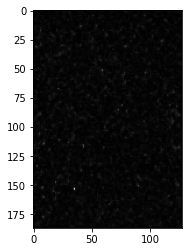

In [35]:
plt.imshow(np.reshape(N[13*si:13*si+si,26],(187,128)),cmap='gray')

In [36]:
df = pd.DataFrame(N)
df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,...,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10
1,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,...,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10
2,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,...,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10
3,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,...,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10
4,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,...,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632955,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,...,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09
2632956,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,...,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09
2632957,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,...,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09
2632958,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,...,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09


In [37]:
name_columns=[]
c=1
for i in range(56):
    if i%2==0:
        name_columns.append(f"m{c}")
    else:
        name_columns.append(f"\u03A9{c}")                   # \u03A9 = Ω
        c+=1
# name_columns.append("c")
# name_columns.append("label")

In [38]:
df.columns=name_columns
df

,m1,Ω1,m2,Ω2,m3,Ω3,m4,Ω4,m5,Ω5,...,m24,Ω24,m25,Ω25,m26,Ω26,m27,Ω27,m28,Ω28
0,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,...,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10
1,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,...,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10
2,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,...,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10
3,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,...,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10
4,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,...,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632955,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,...,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09
2632956,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,...,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09
2632957,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,...,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09
2632958,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,...,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09


In [39]:
df['c']=confidence
df['label']=lable

In [40]:
df

,m1,Ω1,m2,Ω2,m3,Ω3,m4,Ω4,m5,Ω5,...,m25,Ω25,m26,Ω26,m27,Ω27,m28,Ω28,c,label
0,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,...,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,0.643637,2.372526e+10,1.000000,0
1,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,...,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.204641,3.195784e+10,1.000000,0
2,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,...,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,0.939931,2.938111e+10,1.000000,0
3,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,...,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,0.668115,2.107380e+10,1.000000,0
4,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,...,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,0.590018,1.792088e+10,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632955,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,...,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.820634,1.066004e+09,0.384071,0
2632956,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,...,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.762978,1.114930e+09,0.387785,0
2632957,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,...,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.456678,2.296347e+09,0.382638,0
2632958,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,...,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.793599,3.779074e+09,0.382339,0


In [41]:
Dctr=pd.concat([df.iloc[si*15:si*16,:],df.iloc[si*33:si*34,:],df.iloc[si*82:si*83,:],df.iloc[si*99:si*100,:]],axis=0)
Dcts=df.drop(Dctr.index)
print(len(Dctr),len(Dcts),4*si,106*si)

95744 2537216 95744 2537216


In [42]:
xtsc,ytsc=Dcts.iloc[:,:-1],Dcts.iloc[:,-1]
xtrc,ytrc=Dctr.iloc[:,:-1],Dctr.iloc[:,-1]

# Learn with less

In [43]:
from sklearn import tree
def Node_count(classifier):      # calculating number of nodes and depth per tree in forest
    node=[]                    
    depth=[]
    for i in range(len(classifier.estimators_)):  # classifier.estimators_= n_estimators =50
        N=classifier.estimators_[i].tree_.node_count
        D=classifier.estimators_[i].tree_.max_depth
        node.append(N)
        depth.append(D)
    return node,depth
        

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
modelc=RandomForestClassifier(n_estimators=50, criterion='gini',
                              max_depth=None, min_samples_leaf=50, max_features='sqrt', verbose=1, n_jobs=-1)
modelc.fit(xtrc,ytrc)                  # training
Nc,Dc=Node_count(modelc)
ypsc=modelc.predict(xtsc)
accuracy_score(ytsc,ypsc) * 100

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    6.0s finished


96.06813136918575

# Acuuracy wrt each class

In [45]:
R0,R1,R2=sum(ytsc==0),sum(ytsc==127),sum(ytsc==255)

In [79]:
c0,c1,c2=0,0,0
ytsc=list(ytsc)
for index in range(len(ypsc)):
    if ypsc[index]==0 and ytsc[index]==0:
        c0+=1
    elif ypsc[index]==127 and ytsc[index]==127:
        c1+=1
    elif ypsc[index]==255 and ytsc[index]==255:
        c2+=1

In [80]:
# c0,c1,c2=sum(ypsc==0),sum(ypsc==127),sum(ypsc==255)
print(c0/R0,c1/R1,c2/R2)

0.9824675359756703 0.456242707117853 0.5984759916492693


In [74]:
len(ypsc)

2537216

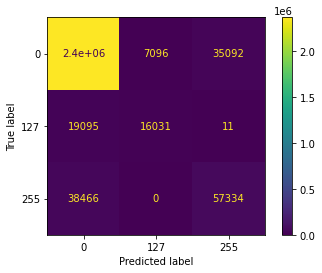

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
cmc=confusion_matrix(ytsc,ypsc,labels=[0,127,255])
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=[0,127,255])
disp.plot()

In [51]:
def visualize_nodes_depth(Node,Depth):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.hist(Node,color='blue')
    plt.ylabel("Number of trees")
    plt.xlabel("Number of nodes")
    plt.title("Distribution of nodes per tree")

    plt.subplot(122)
    plt.hist(Depth,color='green')
    plt.ylabel("Number of trees")
    plt.xlabel("Depth of tree")
    plt.title("Distribution of depth of tree")
    plt.suptitle(f"Distribution of Nodes and Tress for LWLPO",fontsize=16)
    plt.show()

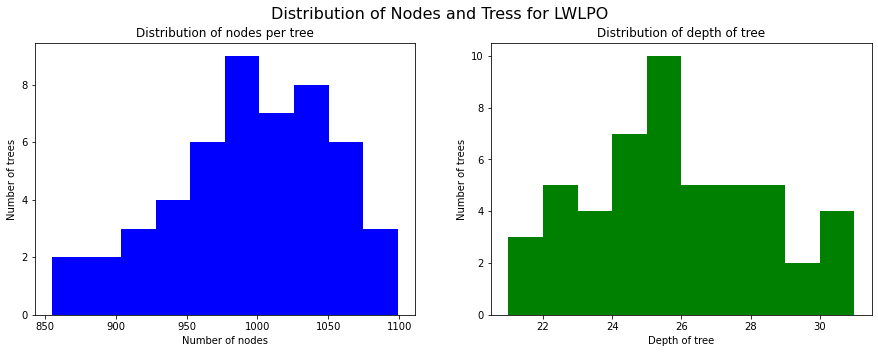

In [52]:
visualize_nodes_depth(Nc,Dc)

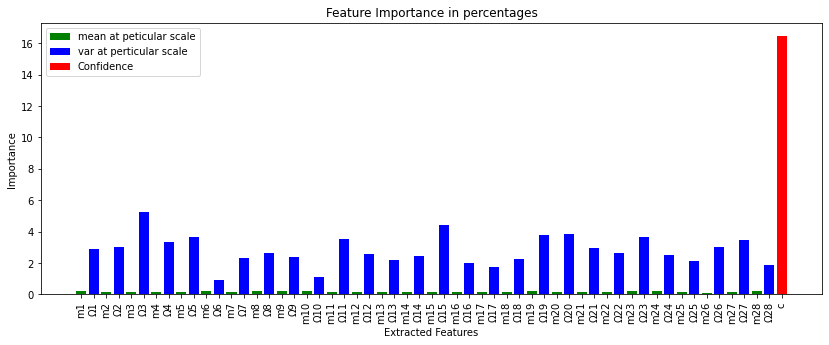

In [53]:
imp=[x*100 for x in modelc.feature_importances_]
n=len(imp)
plt.figure(figsize=(14,5))
pos1=[i for i in range(n-1) if i%2==0]
value1=[imp[i] for i in range(n-1) if i%2==0]
plt.bar(pos1,value1,color='green',label='mean at peticular scale')
pos2=[i for i in range(n-1) if i%2!=0]
value2=[imp[i] for i in range(n-1) if i%2!=0]
plt.bar(pos2,value2,color='blue',label="var at perticular scale")
plt.bar([56],imp[56],color='red',label="Confidence")
plt.xlabel("Extracted Features")
plt.ylabel("Importance")
plt.title("Feature Importance in percentages") 
pos=sorted(pos1+pos2)+[56]
plt.xticks(pos,df.columns[:-1],rotation='vertical')
plt.legend(loc="upper left")
plt.show()

In [54]:
Predicted_img=[]
for i in range(106):
    img1=ypsc[i*si:i*si+si]
    img1=np.reshape(img1,(187,128))
    Predicted_img.append(img1)

In [55]:
def param(i,p):
    OH,OW=187,128    ## shape of output image
    si=OH*OW 
    m=df.iloc[i*si:(i+1)*si,p].tolist()
    m=np.reshape(m,(OH,OW))
#     m=(m-np.min(m))/(np.max(m)-np.min(m))
#     m=np.multiply(m,255)
    return m

In [56]:
def meansstd_visualize(i):     # excluding 15,33,82,99
    plt.figure(figsize=(14,8))

    plt.subplot(171)
    data=IMAGE[i]
    plt.imshow(data[:187,:],cmap='gray')
    plt.title("original_image")
    plt.axis('off')
    
    plt.subplot(172)
    data=LABLE[i]
    plt.imshow(data,cmap='gray')
    plt.title("Groundtruth")
    plt.axis('off')

    plt.subplot(173)
    data=param(i,26)
    plt.imshow(data,cmap='gray')
    plt.title("14th scale mean")
    plt.axis('off')

    plt.subplot(174)
    data=param(i,27)
    plt.imshow(data,cmap='gray')
    plt.title("14th scale std")
    plt.axis('off')

    plt.subplot(175)
    data=param(i,54)
    plt.imshow(data,cmap='gray')
    plt.title("28th scale mean ")
    plt.axis('off')

    plt.subplot(176)
    data=param(i,55)
    plt.imshow(data,cmap='gray')
    plt.title("28th scale std")
    plt.axis('off')
    
    if i>15 and i<33: i-=1
    elif i>33 and i<82: i-=2
    elif i>82 and i<99: i-=3
    elif i>99: i-=4
    plt.subplot(177)
    plt.imshow(Predicted_img[i],cmap='gray')
    plt.title("Predicted")
    plt.axis('off')

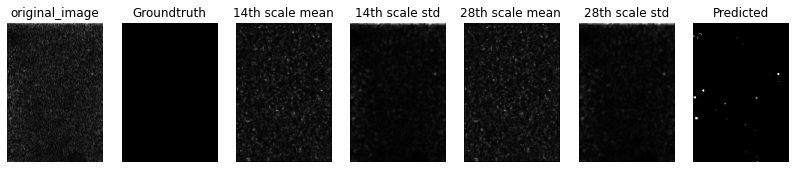

In [57]:
meansstd_visualize(0)

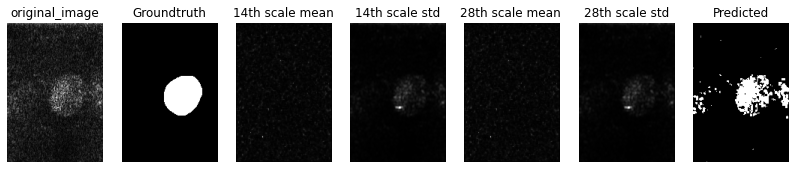

In [58]:
meansstd_visualize(13)

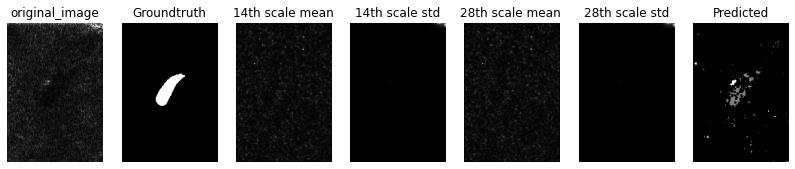

In [59]:
meansstd_visualize(104)

# Learn with more

In [60]:
xtsc1,ytsc1=Dcts.iloc[:,:-1],Dcts.iloc[:,-1]
xtrc1,ytrc1=Dctr.iloc[:,:-1],Dctr.iloc[:,-1]

In [61]:
modelr=RandomForestClassifier(n_estimators=50, criterion='gini',
                              max_depth=None, min_samples_leaf=50, max_features='sqrt', verbose=1, n_jobs=-1)
modelr.fit(xtsc1,ytsc1)                  # training
Nc,Dc=Node_count(modelc)
yprc=modelr.predict(xtrc1)
accuracy_score(ytrc1,yprc) * 100

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.4s finished


93.91397894385027

In [76]:
type(ytrc1)

pandas.core.series.Series

# Acuuracy wrt each class


In [77]:
C0,C1,C2=0,0,0
ytrc1=list(ytrc1)
for ans in range(len(yprc)):
    if yprc[ans]==0 and ytrc1[ans]==0:
        C0+=1
    elif yprc[ans]==127 and ytrc1[ans]==127:
        C1+=1
    elif yprc[ans]==255 and ytrc1[ans]==255:
        C2+=1
        

In [78]:
r0,r1,r2=sum(ytrc==0 ),sum(ytrc==127),sum(ytrc==255)
print(C0/r0,C1/r1,C2/r2)

0.9864196802548523 0.5777724435909746 0.5724754506815184


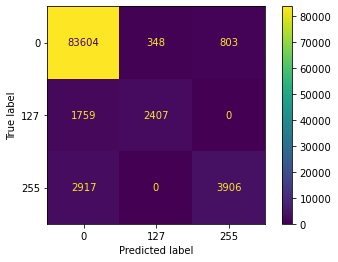

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
cmr=confusion_matrix(ytrc1,yprc,labels=[0,127,255])
disp = ConfusionMatrixDisplay(confusion_matrix=cmr, display_labels=[0,127,255])
disp.plot()

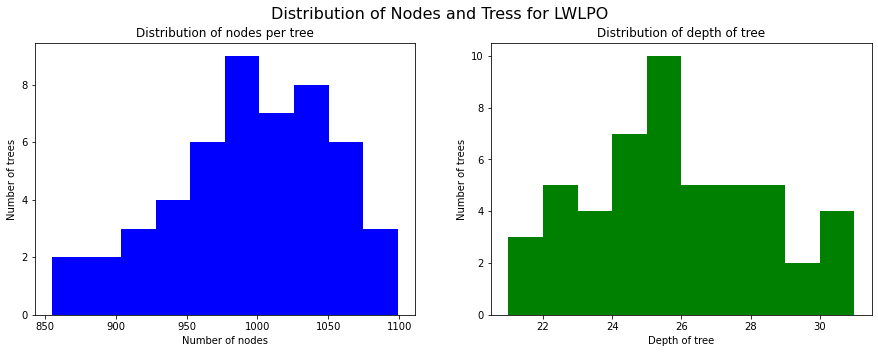

In [64]:
visualize_nodes_depth(Nc,Dc)

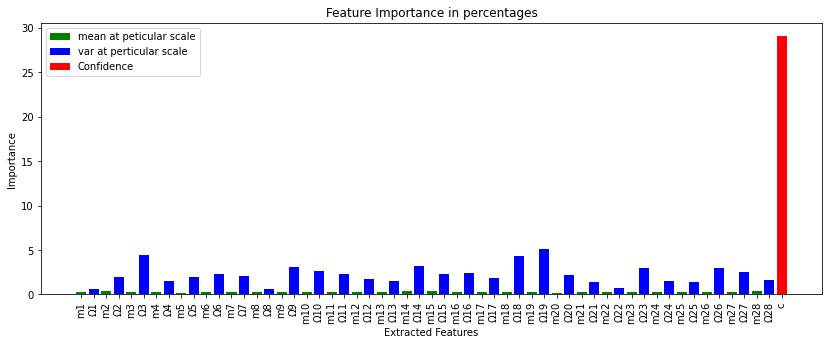

In [65]:
imp=[x*100 for x in modelr.feature_importances_]
n=len(imp)
plt.figure(figsize=(14,5))
pos1=[i for i in range(n-1) if i%2==0]
value1=[imp[i] for i in range(n-1) if i%2==0]
plt.bar(pos1,value1,color='green',label='mean at peticular scale')
pos2=[i for i in range(n-1) if i%2!=0]
value2=[imp[i] for i in range(n-1) if i%2!=0]
plt.bar(pos2,value2,color='blue',label="var at perticular scale")
plt.bar([56],imp[56],color='red',label="Confidence")
plt.xlabel("Extracted Features")
plt.ylabel("Importance")
plt.title("Feature Importance in percentages") 
pos=sorted(pos1+pos2)+[56]
plt.xticks(pos,df.columns[:-1],rotation='vertical')
plt.legend(loc="upper left")
plt.show()

In [66]:
Predicted_r=[]
for i in range(4):
    img=yprc[i*si:i*si+si]
    img1=np.reshape(img,(187,128))
    Predicted_r.append(img1)

In [67]:
len(Predicted_r)

4

In [68]:
def meansstd_visualize(i,j):     # excluding 15,33,82,99
    plt.figure(figsize=(14,8))

    plt.subplot(171)
    data=IMAGE[i]
    plt.imshow(data[:187,:],cmap='gray')
    plt.title("original_image")
    plt.axis('off')
    
    plt.subplot(172)
    data=LABLE[i]
    plt.imshow(data,cmap='gray')
    plt.title("Groundtruth")
    plt.axis('off')

    plt.subplot(173)
    data=param(i,26)
    plt.imshow(data,cmap='gray')
    plt.title("14th scale mean")
    plt.axis('off')

    plt.subplot(174)
    data=param(i,27)
    plt.imshow(data,cmap='gray')
    plt.title("14th scale std")
    plt.axis('off')

    plt.subplot(175)
    data=param(i,54)
    plt.imshow(data,cmap='gray')
    plt.title("28th scale mean ")
    plt.axis('off')

    plt.subplot(176)
    data=param(i,55)
    plt.imshow(data,cmap='gray')
    plt.title("28th scale std")
    plt.axis('off')

    plt.subplot(177)
    plt.imshow(Predicted_r[j],cmap='gray')
    plt.title("Predicted")
    plt.axis('off')

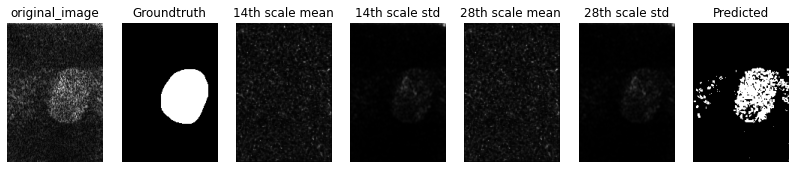

In [69]:
meansstd_visualize(15,0)

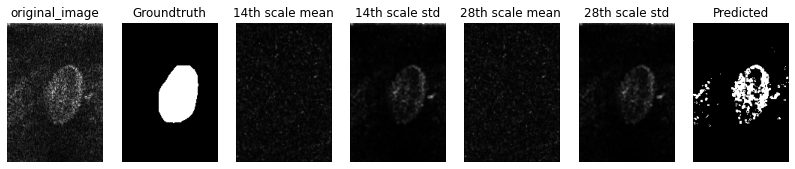

In [70]:
meansstd_visualize(33,1)

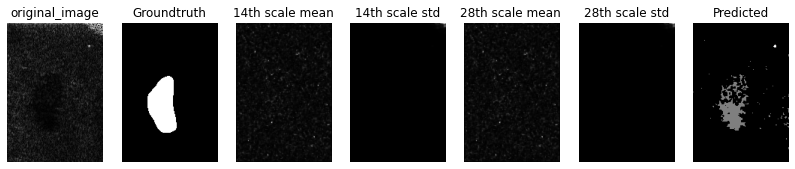

In [71]:
meansstd_visualize(82,2)

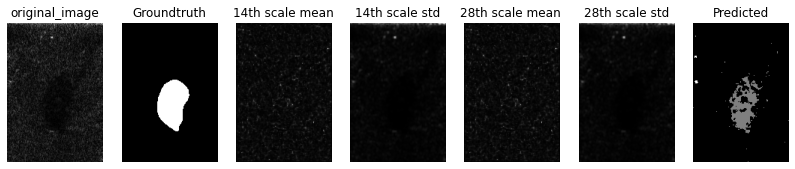

In [72]:
meansstd_visualize(99,3)

In [157]:
np.unique(Predicted_r[3])

array([  0, 127], dtype=uint8)

# omega

E(R^2)

In [12]:
filt=np.ones((3,3))*(1/(3*3))
x=IMAGE[13]
x2=np.multiply(x,x)
omega=ndimage.convolve(x2,filt,mode="constant",cval=0)

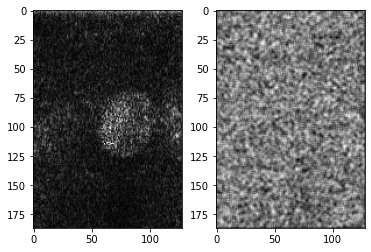

In [13]:
plt.subplot(121)
plt.imshow(x,cmap='gray')
plt.subplot(122)
plt.imshow(omega,cmap='gray')

In [14]:
x4=np.multiply(x2,x2)
nume = np.multiply(omega,omega)
deno = ndimage.convolve(x4,filt,mode='constant',cval=0) - nume
m=np.divide(nume,deno)

C:\Users\AbhiG\AppData\Local\Temp/ipykernel_11732/597189190.py:4: RuntimeWarning: divide by zero encountered in true_divide
  m=np.divide(nume,deno)


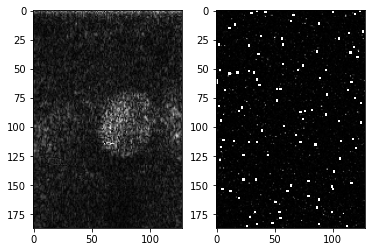

In [15]:
plt.subplot(121)
plt.imshow(x,cmap='gray')
plt.subplot(122)
plt.imshow(m,cmap='gray')